# 전자제조데이터분석 과제 01 
## 제출: eclass 과제메뉴 01 
- 각 코드 블럭의 출력 결과까지 저장하여 제출해주세요.
- 중요 코드에 대해서는 동작방식을 주석으로 설명해주세요.
- ipynb 파일을 그대로 제출해주세요.

##기한: 2021.10.14 23:59

학번: 21512023
이름: 정주현

1) 아래 코드의 동작방식에 대하여 분석/설명하시오.
- 코드 블럭 안에 본인의 분석 내용을 기입할 것.
- 이미지/사진 등도 추가 가능하니 참고.

In [ ]:
# !!!! 과제 관련 코드!!!!
# csv에서 데이터 추출하기
import csv # csv파일을 불러오기 위해 csv 모듈을 import
from pprint import pprint # 데이터를 보기좋게 출력하기위해 pprint 모듈 import

f = open('portfoliodate.csv') # portfoliodate.csv를 열고 이를 f에 저장
rows = csv.reader(f) # csv객체를 이용하여 csv파일을 읽어 rows에 저장
headers = next(rows) # csv의 첫 행(=column name)을 headers 에 저장
print(headers) # column name

select = ['name', 'shares', 'price']
indices = [ headers.index(colname) for colname in select ] # select에 있는 이름들의 위치(index)를 찾아서 저장 (0,3,4)

print(select, indices)
row = next(rows) # headers의 다음 행 row에 저장

# record = { colname: row[index] for colname, index in zip(select, indices) } # 일단 한 행만 읽어서 dictionary로 만들어볼까요?
# print(record)

# 전체 행을 읽어서 dictionary의 리스트로 만들어볼까요?
records = [ { colname: row[index] for colname, index in zip(select, indices) } for row in rows ] # 얘는 사실 read_portfolio와 똑같은 기능을 함!

# rows(header에서 3번째 행부터 시작)에 있는 내용들 중 select안의 컬럼명에 해당하는 것들만 차례로 dictionary형태로 출력
# dictionary에서 key값은 select 안에있는 column명이고, value값은 해당값들이다.


pprint(records)  # 데이터를 보기좋게 출력




['name', 'date', 'time', 'shares', 'price']
['name', 'shares', 'price'] [0, 3, 4]
[{'name': 'IBM', 'price': '91.10', 'shares': '50'},
 {'name': 'CAT', 'price': '83.44', 'shares': '150'},
 {'name': 'MSFT', 'price': '51.23', 'shares': '200'},
 {'name': 'GE', 'price': '40.37', 'shares': '95'},
 {'name': 'MSFT', 'price': '65.10', 'shares': '50'},
 {'name': 'IBM', 'price': '70.44', 'shares': '100'}]


2) sample_string에서 사람의 이름을 찾기 위한 regular expression을 작성하여 아래 함수를 완성하시오.

In [ ]:
import re
def names():
    simple_string = """Amy is 5 years old, and her sister Mary is 2 years old. 
    Ruth and Peter, their parents, have 3 kids."""
  
    p=re.findall(r'[A-Z]{1}[a-z]+',simple_string) # 이 부분을 구현하세요.
    # 이름의 첫글자는 대문자고, 그 뒤는 소문자이다.
    # [A-Z]{1} : 첫글자 대문자
    # [a-z]+ : 그뒤에 소문자, 하나 이상이어야 함.

    return p

In [ ]:
assert len(names()) == 4, "There are four names in the simple_string"
# 사람 이름은 4개가 포함되어 있습니다. 따라서, names()가 정상 동작한다면, 이 코드 블럭의 assert 문을 통과해야 합니다.

* 정규식 패턴 표현

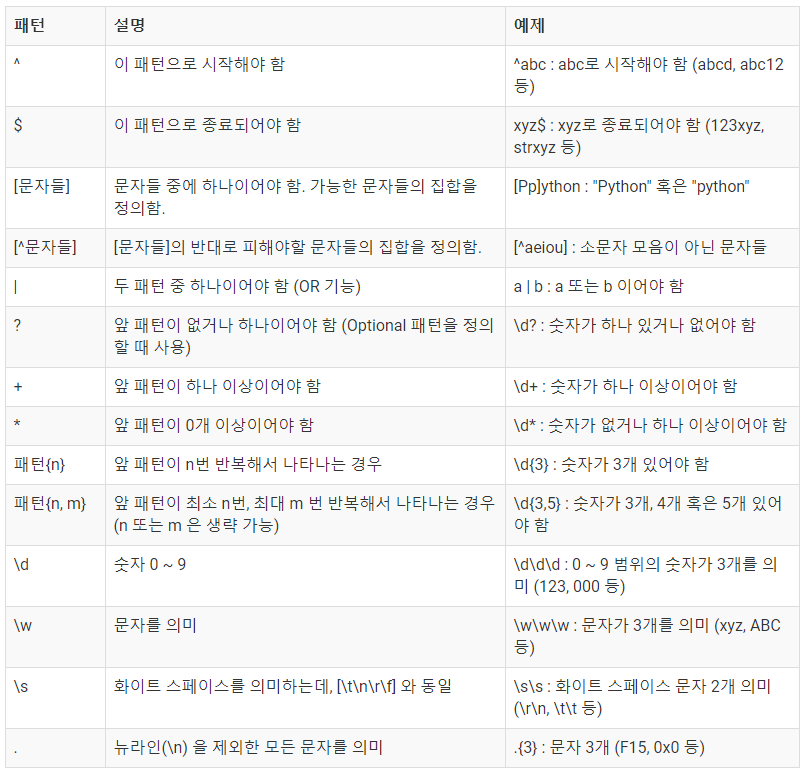

3) grades.txt 파일에는 학생과 학점의 목록이 포함되어 있습니다.

학생들 중 성적이 'B'인 학생들만 return하기 위한 함수를 완성하세요.

In [ ]:
def grades():
    with open ("grades.txt", "r") as file:
        grades = file.readlines() #파일의 내용을 한줄씩 읽어서 리스트 획득
        # 나머지 부분을 구현하세요. 
        B_list = [] # 성적이 B인 사람들을 담을 빈 list 생성
        for x in grades:
           name, grade = x.split(':') # 이름:성적 형태로 되어있으므로 split을 이용하여 :를 기준으로 앞은 name, 뒤는 grade
           if grade.strip() == 'B': #grade에 공백이 포함되어있어서 제거해주고 그것과 B가 같으면 B_list에 append해줌
             B_list.append(name)
    return B_list
            
        

In [ ]:
assert len(grades()) == 16
# grades()가 정상동작한다면 16개의 아이템을 return 해야 합니다.

4) logdata.txt 파일은 웹 페이지 접속 로그를 포함하고 있으며 각각의 라인은 다음과 같은 항목을 포함하고 있습니다:

- a host (e.g., '146.204.224.152')
- a user_name (e.g., 'feest6811' 주의: 이름이 없는 경우도 있는데, 그때는 '-'가 이용됩니다.)
- the time a request was made (e.g., '21/Jun/2019:15:45:24 -0700')
- the post request type (e.g., 'POST /incentivize HTTP/1.1' 주의: POST 요청만 존재하는 것은 아닙니다.)

파일을 읽고 아래와 같은 형식을 가진 딕셔너리들의 리스트를 생성하기 위한 함수를 작성하세요:

```
example_dict = {"host":"146.204.224.152", 
                "user_name":"feest6811", 
                "time":"21/Jun/2019:15:45:24 -0700",
                "request":"POST /incentivize HTTP/1.1"}
```




In [ ]:
def logs():
    with open("logdata.txt", "r") as file:
        logdata = file.read()
        rawdata = logdata.split('\n')
        log_list = []
        for x in rawdata:
          item_dict = {}
          if len(x)<1:
            break
          item_dict['host'] = x.split()[0] #공백을 기준으로 0번째
          item_dict['user_name'] = x.split()[2] #공백을 기준으로 2번째
          item_dict['time'] = x.split()[3][1:] + ' ' + x.split()[4][:-1] #공백을 기준으로 3번째에서 맨앞글자인 '[' 를 뺀 값 + 공백 + 공백을 기준으로 4번째 글자에서 ']'를 뺀 값
          item_dict['request'] = re.findall(r'".+"',x)[0].strip("\"") # "~~" >> 이런 값을 찾고, 큰따옴표 삭제해줌.

          log_list.append(item_dict) # 각 dict를 append해줌!
    return log_list

In [ ]:
assert len(logs()) == 979

one_item={'host': '146.204.224.152',  'user_name': 'feest6811',  'time': '21/Jun/2019:15:45:24 -0700',  'request': 'POST /incentivize HTTP/1.1'}
two_item={'host': '245.247.95.68', 'user_name': 'cummerata3376', 'time': '21/Jun/2019:15:47:24 -0700', 'request': 'GET /redefine HTTP/2.0'}
three_item = {'host': '148.174.255.122', 'user_name': '-', 'time': '21/Jun/2019:15:56:09 -0700', 'request': 'PATCH /recontextualize HTTP/2.0'}

assert one_item in logs(), "Sorry, this item should be in the log results, check your formating"
assert two_item in logs(), "Sorry, this item should be in the log results, check your formating"
assert three_item in logs(), "Sorry, this item should be in the log results, check your formating"

# 4개의 assert를 모두 통과해야 합니다.
# 979개의 딕셔너리를 포함한 리스트가 생성되어야 하고 상기 아이템들이이 리스트에 포함되어 있어야 합니다.